#載入套件


In [2]:
!pip install mediapipe

     |████████████████████████████████| 47.4MB 83kB/s 


#載入資料

In [ ]:
!cp '/content/drive/MyDrive/data/data_v5.zip' /content  #載入ZIP
!cp '/content/drive/MyDrive/data/data_v6.zip' /content  #載入ZIP

In [3]:
!cp '/content/drive/MyDrive/data/data_v2.zip' /content  #載入ZIP
!cp '/content/drive/MyDrive/data/data_v3.zip' /content  #載入ZIP

In [ ]:
!unzip /content/data_v5.zip -d /content/    #解壓縮
!unzip /content/data_v6.zip -d /content/    #解壓縮

In [4]:
!unzip /content/data_v2.zip -d /content/    #解壓縮
!unzip /content/data_v3.zip -d /content/    #解壓縮

Archive:  /content/data_v2.zip
   creating: /content/data_v2/
  inflating: /content/data_v2/happy.csv  
  inflating: /content/data_v2/husband.csv  
  inflating: /content/data_v2/older_brother.csv  
  inflating: /content/data_v2/one_year.csv  
  inflating: /content/data_v2/wedding.csv  
  inflating: /content/data_v2/wife.csv  
  inflating: /content/data_v2/younger_brother.csv  
Archive:  /content/data_v3.zip
   creating: /content/data_v3/
  inflating: /content/data_v3/happy.csv  
  inflating: /content/data_v3/husband.csv  
  inflating: /content/data_v3/older_brother.csv  
  inflating: /content/data_v3/one_year.csv  
  inflating: /content/data_v3/wedding.csv  
  inflating: /content/data_v3/wife.csv  
  inflating: /content/data_v3/younger_brother.csv  


In [ ]:
# %rm -rf 003.csv         #刪除資料夾hand or 檔案
# %rm -rf 005.csv         #刪除資料夾hand or 檔案
# %rm -rf 006.csv         #刪除資料夾hand or 檔案%
# %rm -rf 007.csv         #刪除資料夾hand or 檔案
# %rm -rf 010.csv         #刪除資料夾hand or 檔案


#資料前處理

In [5]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM, TimeDistributed, RepeatVector
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline


##處理0的方法一

In [ ]:
def deal_0(train):
  train = train.iloc[:,1:-1]
  count=0
  while not train.min().all()   :   #直到最小值沒有0
    if count > 4: 
      break
    count += 1
    for i in range(0,len(train)):
      if train.iloc[i,0] == 0: 
        if i % 20 == 0:
          train.iloc[i,0:63] = train.iloc[i+1,0:63]
        elif i % 20 == 19:
          train.iloc[i,0:63] = train.iloc[i-1,0:63]
        else:      
          train.iloc[i,0:63] = (train.iloc[i-1,0:63]+train.iloc[i+1,0:63])/2

      if train.iloc[i,63] == 0:
        if i % 20 == 0:
          train.iloc[i,63:126] = train.iloc[i+1,63:126]
        elif i % 20 == 19:
          train.iloc[i,63:126] = train.iloc[i-1,63:126]
        else:      
          train.iloc[i,63:126] = (train.iloc[i-1,63:126]+train.iloc[i+1,63:126])/2
      
      if train.iloc[i,126] == 0:
        if i % 20 == 0:
          train.iloc[i,126:129] = train.iloc[i+1,126:129]
        elif i % 20 == 19:
          train.iloc[i,126:129] = train.iloc[i-1,126:129]
        else:      
          train.iloc[i,126:129] = (train.iloc[i-1,126:129]+train.iloc[i+1,126:129])/2

      if train.iloc[i,129] == 0:
        if i % 20 == 0:
          train.iloc[i,129:132] = train.iloc[i+1,129:132]
        elif i % 20 == 19:
          train.iloc[i,129:132] = train.iloc[i-1,129:132]
        else:      
          train.iloc[i,129:132] = (train.iloc[i-1,129:132]+train.iloc[i+1,129:132])/2

      if train.iloc[i,132] == 0:
        if i % 20 == 0:
          train.iloc[i,132:135] = train.iloc[i+1,132:135]
        elif i % 20 == 19:
          train.iloc[i,132:135] = train.iloc[i-1,132:135]
        else:      
          train.iloc[i,132:135] = (train.iloc[i-1,132:135]+train.iloc[i+1,132:135])/2
  return train


##處理0的方法二

In [ ]:
def deal_0(train):
  train = train.iloc[:,1:]
  print(train.shape)
  up=1
  #0~63
  error_0 = 1
  error_63 = 1
  error_126 = 1
  error_129 = 1
  error_132 = 1
  for i in range(0,len(train)):
    if train.iloc[i,0] == 0 and error_0 != 1:
      if i % 20 == 0:
        up=1
        while up != 0 :
          if up>15:
            error_0 = 0
            print('error_0 = 0')
            break
          if train.iloc[i+up , 0] == 0:
            up += 1
          else : 
            train.iloc[i+up-1,0:63] = train.iloc[i+up,0:63]
            up -= 1

      elif i % 20 == 19:
        up=1
        while up != 0 :
          if up>15:
            error_0 = 0
            print('error_0 = 0')
            break
          if train.iloc[i-up , 0] == 0:
            up += 1
          else : 
            train.iloc[i-up+1,0:63] = train.iloc[i-up,0:63]
            up -= 1
      else:
        up=1
        while 1 :
            
          if up>15:
            error_0 = 0
            print('error_0 = 0')
            break
          if train.iloc[i + up , 0] == 0:
            up += 1
          else:
            for j in range(1, up+1):
              train.iloc[i+j-1,0:63] = train.iloc[i-1,0:63] - ( (train.iloc[i-1,0:63]-train.iloc[i+up,0:63]) / (up+1) ) * j
            break
          if (i%20)+up>19:
            for j in range(1, up):
              train.iloc[i+j,0:63] = train.iloc[i-1,0:63]
            break
            
    
    #63~126
    if train.iloc[i,63] == 0 and error_63 != 1:
      if i % 20 == 0:
        up=1
        while up != 0 :
          if up>15:
            error_63 = 0
            print('error_63 = 0')
            break
          if train.iloc[i+up , 63] == 0:
            up += 1
          else : 
            train.iloc[i+up-1,63:126] = train.iloc[i+up,63:126]
            up -= 1

      elif i % 20 == 19:
        up=1
        while up != 0 :
          if up>15:
            error_63 = 0
            print('error_63 = 0')
            break
          if train.iloc[i-up , 63] == 0:
            up += 1
          else : 
            train.iloc[i-up+1,63:126] = train.iloc[i-up,63:126]
            up -= 1
      else:
        
        up=1
        while 1 :
          if up>15:
            error_63 = 0
            print('error_63 = 0')
            break
          if train.iloc[i + up , 63] == 0:
            up += 1
          else:
            for j in range(1, up+1):
              train.iloc[i+j-1,63:126] = train.iloc[i-1,63:126] - ( (train.iloc[i-1,63:126]-train.iloc[i+up,63:126]) / (up+1) ) * j
            break
          if (i%20)+up>19:
            for j in range(1, up):
              train.iloc[i+j,63:126] = train.iloc[i-1,63:126]
            break
    #126~129
    if train.iloc[i,126] == 0 and error_126 != 1:
      if i % 20 == 0:
        up=1
        while up != 0 :
          if up>15:
            error_126 = 0
            print('error_126 = 0')
            break
          if train.iloc[i+up , 126] == 0:
            up += 1
          else : 
            train.iloc[i+up-1,126:129] = train.iloc[i+up,126:129]
            up -= 1

      elif i % 20 == 19:
        up=1
        while up != 0 :
          if up>15:
            error_126 = 0
            print('error_126 = 0')
            break
          if train.iloc[i-up , 126] == 0:
            up += 1
          else : 
            train.iloc[i-up+1,126:129] = train.iloc[i-up,126:129]
            up -= 1
      else:
        up=1
        while 1 :
          if up>15:
            error_126 = 0
            print('error_126 = 0')
            break
          if train.iloc[i + up , 126] == 0:
            up += 1
          else:
            for j in range(1, up+1):
              train.iloc[i+j-1,126:129] = train.iloc[i-1,126:129] - ( (train.iloc[i-1,126:129]-train.iloc[i+up,126:129]) / (up+1) ) * j
            break
          if (i%20)+up>19:
            for j in range(1, up):
              train.iloc[i+j,126:129] = train.iloc[i-1,126:129]
            break
    #129~132
    if train.iloc[i,129] == 0 and error_129 != 1:
      if i % 20 == 0:
        up=1
        while up != 0 :
          if up>15:
            error_129 = 0
            print('error_129 = 0')
            break
          if train.iloc[i+up , 129] == 0:
            up += 1
          else : 
            train.iloc[i+up-1,129:132] = train.iloc[i+up,129:132]
            up -= 1

      elif i % 20 == 19:
        up=1
        while up != 0 :
          if up>15:
            error_129 = 0
            print('error_129 = 0')
            break
          if train.iloc[i-up , 129] == 0:
            up += 1
          else : 
            train.iloc[i-up+1,129:132] = train.iloc[i-up,129:132]
            up -= 1
      else:
        up=1
        while 1 :
          if up>15:
            error_129 = 0
            print('error_129 = 0')
            break
          if train.iloc[i + up , 129] == 0:
            up += 1
          else:
            for j in range(1, up+1):
              train.iloc[i+j-1,129:132] = train.iloc[i-1,129:132] - ( (train.iloc[i-1,129:132]-train.iloc[i+up,129:132]) / (up+1) ) * j
            break
          if (i%20)+up>19:
            for j in range(1, up):
              train.iloc[i+j,129:132] = train.iloc[i-1,129:132]
            break
    #132~135
    if train.iloc[i,132] == 0 and error_132 != 1:

      if i % 20 == 0:
        up=1
        while up != 0 :
          if up>15:
            error_132 = 0
            print('error_132 = 0')
            break
          if train.iloc[i+up , 132] == 0:
            up += 1
          else : 
            train.iloc[i+up-1,132:135] = train.iloc[i+up,132:135]
            up -= 1

      elif i % 20 == 19:
        up=1
        while up != 0 :
          if up>15:
            error_132 = 0
            print('error_132 = 0')
            break
          if train.iloc[i-up , 132] == 0:
            up += 1
          else : 
            train.iloc[i-up+1,132:135] = train.iloc[i-up,132:135]
            up -= 1
      else:
        up=1
        while 1 :
          if up>15:
            error_132 = 0
            print('error_132 = 0')
            break
          if train.iloc[i + up , 132] == 0:
            up += 1
          else:
            for j in range(1, up+1):
              train.iloc[i+j-1,132:135] = train.iloc[i-1,132:135] - ( (train.iloc[i-1,132:135]-train.iloc[i+up,132:135]) / (up+1) ) * j
            break
          if (i%20)+up>19:
            for j in range(1, up):
              train.iloc[i+j,132:135] = train.iloc[i-1,132:135]
            break
            
  return train


##處理0的方法三
去掉pose 15 16
並且得到 nose 到 手心的

In [7]:
def deal_0(train):
  train = train.iloc[:,1:]
  print(train.shape)
  up=1
  a = 20
  #0~63
  error_0 = 1
  error_63 = 1
  error_126 = 1
  error_129 = 1
  error_132 = 1
  for i in range(0,len(train)):
    if train.iloc[i,0] == 0 and error_0 == 1:
      if i % a == 0:
        up=1
        while up != 0 :
          if up>25:
            error_0 = 0
            print('error_0 = 0')
            print('i=',i)
            break
          if train.iloc[i+up , 0] == 0:
            up += 1
          else : 
            train.iloc[i+up-1,0:63] = train.iloc[i+up,0:63]
            up -= 1

      elif i % a == a-1:
        up=1
        while up != 0 :
          if up>25:
            error_0 = 0
            print('error_0 = 0')
            print('i=',i)
            break
          if train.iloc[i-up , 0] == 0:
            up += 1
          else : 
            train.iloc[i-up+1,0:63] = train.iloc[i-up,0:63]
            up -= 1
      else:
        up=1
        while 1 :
            
          if up>25:
            error_0 = 0
            print('error_0 = 0')
            print('i=',i)
            break
          if train.iloc[i + up , 0] == 0:
            up += 1
          else:
            for j in range(1, up+1):
              train.iloc[i+j-1,0:63] = train.iloc[i-1,0:63] - ( (train.iloc[i-1,0:63]-train.iloc[i+up,0:63]) / (up+1) ) * j
            break
          if (i%a)+up>a-1:
            for j in range(1, up):
              train.iloc[i+j,0:63] = train.iloc[i-1,0:63]
            break
            
    
    #63~126
    if train.iloc[i,63] == 0 and error_63 == 1:
      if i % a == 0:
        up=1
        while up != 0 :
          if up>25:
            error_63 = 0
            print('error_63 = 0')
            print('i=',i)
            break
          if train.iloc[i+up , 63] == 0:
            up += 1
          else : 
            train.iloc[i+up-1,63:126] = train.iloc[i+up,63:126]
            up -= 1

      elif i % a == a-1:
        up=1
        while up != 0 :
          if up>25:
            error_63 = 0
            print('error_63 = 0')
            print('i=',i)
            break
          if train.iloc[i-up , 63] == 0:
            up += 1
          else : 
            train.iloc[i-up+1,63:126] = train.iloc[i-up,63:126]
            up -= 1
      else:
        
        up=1
        while 1 :
          if up>25:
            error_63 = 0
            print('error_63 = 0')
            print('i=',i)
            break
          if train.iloc[i + up , 63] == 0:
            up += 1
          else:
            for j in range(1, up+1):
              train.iloc[i+j-1,63:126] = train.iloc[i-1,63:126] - ( (train.iloc[i-1,63:126]-train.iloc[i+up,63:126]) / (up+1) ) * j
            break
          if (i%a)+up>a-1:
            for j in range(1, up):
              train.iloc[i+j,63:126] = train.iloc[i-1,63:126]
            break
    #126~129
    if train.iloc[i,126] == 0 and error_126 == 1:
      if i % a == 0:
        up=1
        while up != 0 :
          if up>25:
            error_126 = 0
            print('error_126 = 0')
            print('i=',i)
            break
          if train.iloc[i+up , 126] == 0:
            up += 1
          else : 
            train.iloc[i+up-1,126:129] = train.iloc[i+up,126:129]
            up -= 1

      elif i % a == a-1:
        up=1
        while up != 0 :
          if up>25:
            error_126 = 0
            print('error_126 = 0')
            print('i=',i)
            break
          if train.iloc[i-up , 126] == 0:
            up += 1
          else : 
            train.iloc[i-up+1,126:129] = train.iloc[i-up,126:129]
            up -= 1
      else:
        up=1
        while 1 :
          if up>25:
            error_126 = 0
            print('error_126 = 0')
            print('i=',i)
            break
          if train.iloc[i + up , 126] == 0:
            up += 1
          else:
            for j in range(1, up+1):
              train.iloc[i+j-1,126:129] = train.iloc[i-1,126:129] - ( (train.iloc[i-1,126:129]-train.iloc[i+up,126:129]) / (up+1) ) * j
            break
          if (i%a)+up>a-1:
            for j in range(1, up):
              train.iloc[i+j,126:129] = train.iloc[i-1,126:129]
            break

  if error_0 == 0 :
    train.iloc[:,0:63] == 0
  if error_63 == 0 :
    train.iloc[:,63:126] == 0


  
  train.iloc[:,126] = train.iloc[:,126] - 0.5
  train.iloc[:,127] = train.iloc[:,127] - 0.5
  for i in range (0,42):
    train.iloc[:,i*3] = train.iloc[:,i*3] - train.iloc[:,126]
    train.iloc[:,i*3+1] = train.iloc[:,i*3+1] - train.iloc[:,127]
  
  train.iloc[:,129] = train.iloc[:,126] - train.iloc[:,0]
  train.iloc[:,130] = train.iloc[:,127] - train.iloc[:,1]
  train.iloc[:,131] = train.iloc[:,128] - train.iloc[:,2]
  
  train.iloc[:,132] = train.iloc[:,132] - train.iloc[:,63]
  train.iloc[:,133] = train.iloc[:,133] - train.iloc[:,64]
  train.iloc[:,134] = train.iloc[:,134] - train.iloc[:,65]

            
  return train


In [ ]:
train = pd.read_csv(file_os+"happy.csv")
train = train.iloc[:,1:]
print(train.iloc[:,126] - 0.5)


0      -0.029447
1      -0.027941
2      -0.031973
3      -0.500000
4      -0.032529
          ...   
8995   -0.019597
8996   -0.021638
8997   -0.022532
8998   -0.500000
8999   -0.500000
Name: pose_x_0, Length: 9000, dtype: float64


##整合資料

In [8]:
import numpy as np
import pandas as pd
#建立資料列名稱
def clear_data():
    data = pd.DataFrame(columns=(
                        #右手
                        'right_hand_x_0','right_hand_y_0',
                        'right_hand_x_1','right_hand_y_1',
                        'right_hand_x_2','right_hand_y_2',
                        'right_hand_x_3','right_hand_y_3',
                        'right_hand_x_4','right_hand_y_4',
                        'right_hand_x_5','right_hand_y_5',
                        'right_hand_x_6','right_hand_y_6',
                        'right_hand_x_7','right_hand_y_7',
                        'right_hand_x_8','right_hand_y_8',
                        'right_hand_x_9','right_hand_y_9',
                        'right_hand_x_10','right_hand_y_10',
                        'right_hand_x_11','right_hand_y_11',
                        'right_hand_x_12','right_hand_y_12',
                        'right_hand_x_13','right_hand_y_13',
                        'right_hand_x_14','right_hand_y_14',
                        'right_hand_x_15','right_hand_y_15',
                        'right_hand_x_16','right_hand_y_16',
                        'right_hand_x_17','right_hand_y_17',
                        'right_hand_x_18','right_hand_y_18',
                        'right_hand_x_19','right_hand_y_19',
                        'right_hand_x_20','right_hand_y_20',

                        'left_hand_x_0','left_hand_y_0',
                        'left_hand_x_1','left_hand_y_1',
                        'left_hand_x_2','left_hand_y_2',
                        'left_hand_x_3','left_hand_y_3',
                        'left_hand_x_4','left_hand_y_4',
                        'left_hand_x_5','left_hand_y_5',
                        'left_hand_x_6','left_hand_y_6',
                        'left_hand_x_7','left_hand_y_7',
                        'left_hand_x_8','left_hand_y_8',
                        'left_hand_x_9','left_hand_y_9',
                        'left_hand_x_10','left_hand_y_10',
                        'left_hand_x_11','left_hand_y_11',
                        'left_hand_x_12','left_hand_y_12',
                        'left_hand_x_13','left_hand_y_13',
                        'left_hand_x_14','left_hand_y_14',
                        'left_hand_x_15','left_hand_y_15',
                        'left_hand_x_16','left_hand_y_16',
                        'left_hand_x_17','left_hand_y_17',
                        'left_hand_x_18','left_hand_y_18',
                        'left_hand_x_19','left_hand_y_19',
                        'left_hand_x_20','left_hand_y_20',

                        'pose_x_0','pose_y_0','pose_z_0',# 鼻子
                        'pose_x_15','pose_y_15','pose_z_15',  #左手
                        'pose_x_16','pose_y_16','pose_z_16' #右手
                        ))
    return data

In [ ]:
# def buildTrain(train, y):  #幾筆資料為一組
#   X_train, Y_train = [], []
#   a = 90
#   for i in range(0,len(train)//a):
#     X_train.append(np.array(train.iloc[i*a:(i+1)*a]))
#     Y_train.append(y)
#   return np.array(X_train), np.array(Y_train)

原本的

In [ ]:
def buildTrain(train, y):  #幾筆資料為一組 並且標準化
  X_train, Y_train = [], []
  a = 90


  for i in range(0,len(train)//a):
    for j in range(0,135):
      if train.iloc[i*a:(i+1)*a,j].std() != 0:
        train.iloc[i*a:(i+1)*a,j] = (train.iloc[i*a:(i+1)*a,j]-train.iloc[i*a:(i+1)*a,j].mean())/train.iloc[i*a:(i+1)*a,j].std()  
    X_train.append(np.array( train.iloc[i*a:(i+1)*a]  ))
    Y_train.append(y)

  return np.array(X_train), np.array(Y_train)

對應出來是b_1，i_1


In [ ]:
def buildTrain(train, y):  #幾筆資料為一組 並且標準化
  X_train, Y_train = [], []
  a = 90
  b = 90


  for i in range(0,len(train)//a):
    for j in range(0,135):
      if train.iloc[i*a:(i+1)*a,j].std() != 0:
        train.iloc[i*a:(i+1)*a,j] = (train.iloc[i*a:(i+1)*a,j]-train.iloc[i*a:(i+1)*a,j].mean())/train.iloc[i*a:(i+1)*a,j].std() 
  print('標準化完成')
  for i in range(0,len(train)):
    X_train.append(np.array( train.iloc[i:(i+1),:]  ))
    if i % b == 0: 
      Y_train.append(10+y)   #b_y
    elif i % b == (b-1):
      Y_train.append(30+y)   #i_y
    else:
      Y_train.append(20+y)   #e_y


  return np.array(X_train), np.array(Y_train)

對應出來是[b,1],[b,2] #須修正

In [ ]:
#須修正
def buildTrain(train, y):  #幾筆資料為一組 並且標準化
  X_train, Y_train = [], []
  a = 1
  b = 90


  for i in range(0,len(train)):
    for j in range(0,135):
      if train.iloc[i*a:(i+1)*a,j].std() != 0:
        train.iloc[i*a:(i+1)*a,j] = (train.iloc[i*a:(i+1)*a,j]-train.iloc[i*a:(i+1)*a,j].mean())/train.iloc[i*a:(i+1)*a,j].std()  
    X_train.append(np.array( train.iloc[i*a:(i+1)*a]  ))
    if i % b == 0: 
      Y_train.append([1,y])   #b_y
    elif i % b == (b-1):
      Y_train.append([3,y])   #i_y
    else:
      Y_train.append([2,y])   #e_y


  return np.array(X_train), np.array(Y_train)

每個除以第一張圖


In [9]:
def buildTrain(train, y):  #幾筆資料為一組 並且標準化
  X_train, Y_train = [], []
  # a = 90
  a = 20

  for i in range(0,len(train)//a):
    for j in range(0,135):
      if train.iloc[i*a,j] != 0:
        for k in range(a):
          train.iloc[i*a+k,j] = train.iloc[i*a+k,j] / train.iloc[i*a,j] 
    
    X_train.append(np.array( train.iloc[i*a:(i+1)*a]  ))
    Y_train.append(y)

  return np.array(X_train), np.array(Y_train)

測試中

In [ ]:
def buildTrain(train, y):  #幾筆資料為一組 並且標準化
  X_train, Y_train = [], []
  a = 90
  b = 10
  print('buildingTrain...')

  for i in range(0,len(train)//a):
    for j in range(0,135):
      if train.iloc[i*a:(i+1)*a,j].std() != 0:
        train.iloc[i*a:(i+1)*a,j] = (train.iloc[i*a:(i+1)*a,j]-train.iloc[i*a:(i+1)*a,j].mean())/train.iloc[i*a:(i+1)*a,j].std() 
  data_0 = clear_data()
  data = clear_data()
  for i in range(5):
    data_0.loc[i,:]=train.iloc[i,:]*0
  
  data = pd.concat([data_0, train.iloc[i*90:(i+1)*90,:]])
  data = pd.concat([data, data_0])
  for i in range(1,len(train)//a):   
    data = pd.concat([data, data_0])
    data = pd.concat([data, train.iloc[i*90:(i+1)*90,:]])
    data = pd.concat([data, data_0])
  print(f'目前:{data.shape}')


  for i in range(0,len(data)//b): 
    X_train.append(np.array( data[i*b:(i+1)*b]  ))
    if i % b == 0:
      Y_train.append(1)
    elif i % b == b-1:
      Y_train.append(-1)
    else :
      Y_train.append(0)

  return np.array(X_train), np.array(Y_train)

In [10]:
file_list = ['happy','husband','older_brother','one_year','wedding','wife','younger_brother']
# file_list = ['happy','husband','older_brother','wedding','wife','younger_brother']
file_os = "/content/data_v2/"
#0
train = pd.read_csv(file_os+"happy.csv")
train = deal_0(train)
X_train_1, Y_train_1 = buildTrain(train,0)
print(X_train_1.shape)
#1
train = pd.read_csv(file_os+"husband.csv")
train = deal_0(train)
X_train_2, Y_train_2 = buildTrain(train,1)

print(X_train_2.shape)
X=np.concatenate((X_train_1, X_train_2), axis=0)
Y=np.concatenate((Y_train_1, Y_train_2), axis=0)
#2
for i in range(2,len(file_list)):
  print(file_list[i])
  train = pd.read_csv(file_os+file_list[i]+'.csv')
  train = deal_0(train)
  X_train, Y_train = buildTrain(train,i)
  X=np.concatenate((X, X_train), axis=0)
  Y=np.concatenate((Y, Y_train), axis=0) 

# train = pd.read_csv("/content/data_v2/older_brother.csv")
# train = deal_0(train)
# X_train, Y_train = buildTrain(train,2)

# X=np.concatenate((X, X_train), axis=0)
# Y=np.concatenate((Y, Y_train), axis=0)
# #3
# train = pd.read_csv("/content/data_v2/one_year.csv")
# train = deal_0(train)
# X_train, Y_train = buildTrain(train,3)
# X=np.concatenate((X, X_train), axis=0)
# Y=np.concatenate((Y, Y_train), axis=0)
# #4
# train = pd.read_csv("/content/data_v2/wedding.csv")
# train = deal_0(train)
# X_train, Y_train = buildTrain(train,4)
# X=np.concatenate((X, X_train), axis=0)
# Y=np.concatenate((Y, Y_train), axis=0)
# #5
# train = pd.read_csv("/content/data_v2/wife.csv")
# train = deal_0(train)
# X_train, Y_train = buildTrain(train,5)
# X=np.concatenate((X, X_train), axis=0)
# Y=np.concatenate((Y, Y_train), axis=0)
# #6
# train = pd.read_csv("/content/data_v2/younger_brother.csv")
# train = deal_0(train)
# X_train, Y_train = buildTrain(train,6)
# X=np.concatenate((X, X_train), axis=0)
# Y=np.concatenate((Y, Y_train), axis=0)

(2000, 135)
(100, 20, 135)
(2000, 135)
(100, 20, 135)
older_brother
(1880, 135)
error_63 = 0
i= 0
one_year
(2000, 135)
wedding
(2000, 135)
wife
(2000, 135)
younger_brother
(2000, 135)
error_63 = 0
i= 0


In [83]:
file_list = ['happy','husband','older_brother','one_year','wedding','wife','younger_brother']
# file_list = ['happy','husband','older_brother','wedding','wife','younger_brother']
file_os = "/content/data_v3/"
for i in range(0,len(file_list)):
  print(file_list[i])
  train = pd.read_csv(file_os+file_list[i]+'.csv')
  train = deal_0(train)
  X_train, Y_train = buildTrain(train,i)
  X=np.concatenate((X, X_train), axis=0)
  Y=np.concatenate((Y, Y_train), axis=0) 


happy
(2000, 135)
husband
(2000, 135)
older_brother
(1820, 135)
error_63 = 0
i= 0
one_year
(2000, 135)
wedding
(2000, 135)
wife
(2000, 135)
younger_brother
(940, 135)
error_63 = 0
i= 0


#Model

##one-hot  y


In [11]:
from keras import utils
print(utils.to_categorical(Y)) 
y=utils.to_categorical(Y)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


##資料切割成測試集跟訓練集

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X,y,test_size=0.2,random_state=1,
)

In [13]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, Y_train, Y_test = train_test_split(
#     X,Y,test_size=0.2,random_state=1,
# )

In [14]:
X_train.shape

(555, 20, 135)

##訓練model

In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

batch_size = 128
model = Sequential()
# model.add(Embedding(max_features, 8, input_length=500))
# model.add(Dropout(0.5))
model.add(LSTM(256, input_shape=(X.shape[1],X.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(7, activation='softmax'))

model.summary()
# early_stopper = EarlyStopping(min_delta=0.001, patience=10)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, Y_train,
                    epochs=100,
                    shuffle=True,
                    batch_size=batch_size,
                    validation_split=0.2)
                    # callbacks=[early_stopper])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 20, 256)           401408    
_________________________________________________________________
dropout (Dropout)            (None, 20, 256)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                82176     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 7)                 455       
Total params: 484,039
Trainable params: 484,039
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
4/4 [==============================] - 5s 514ms/step - loss: 1.8786 - accuracy: 0.2098 - val_loss: 1.545

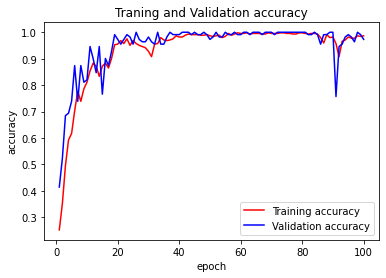

In [16]:
loss = history.history['accuracy']
val_loss = history.history['val_accuracy']
epoch = range(1, len(loss)+1)
plt.plot(epoch, loss, 'r', label='Training accuracy')
plt.plot(epoch, val_loss, 'b', label='Validation accuracy')
plt.title('Traning and Validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

##model測試

In [17]:
result = model.predict(X_test)
# print(result)

y_predict = np.argmax(result,axis=1)
print(y_predict)


z=np.argmax(Y_test,axis=1)
print(z)

# scores = model.evaluate(X, y, verbose=0)

test_acc= len(y_predict[y_predict == z])/len(z) * 100
print(f"Test accuracy: {format(test_acc)}%")

[6 0 5 5 0 1 3 1 0 4 5 6 2 6 5 4 0 5 6 0 0 1 4 3 0 4 5 3 3 1 4 4 4 2 5 3 0
 3 2 5 4 4 2 5 0 0 3 6 4 0 1 2 4 1 5 2 1 3 0 5 0 0 4 0 0 0 6 1 2 0 6 6 4 6
 0 1 2 6 1 3 5 4 3 0 6 6 0 2 5 3 5 1 1 0 3 4 2 6 1 4 6 3 3 3 5 6 1 2 0 5 1
 6 5 1 3 3 0 5 3 0 1 1 2 4 3 3 6 3 5 1 0 4 3 2 1 0 4 1 3]
[6 0 5 5 0 1 3 1 0 4 5 6 2 6 5 4 0 5 2 0 0 1 4 3 0 4 5 3 3 1 4 4 4 2 5 3 0
 3 2 5 4 4 2 5 0 0 3 6 4 0 1 2 4 1 5 2 1 3 0 5 0 0 4 0 0 0 6 1 2 0 6 6 4 6
 0 1 2 6 1 3 5 4 3 0 6 6 0 2 5 3 5 1 1 0 0 4 2 6 1 4 6 3 3 3 5 6 1 2 0 5 1
 6 5 1 3 3 0 5 3 0 1 1 2 4 3 3 6 3 5 1 0 4 3 2 1 0 4 1 3]
Test accuracy: 98.56115107913669%


##儲存model

In [57]:
model.save('/content/drive/MyDrive/data/model_v10.h5')
print("OK")

OK


##載入model

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/data/model_v6.h5')

#載入其他影片資料

In [94]:
!cp '/content/drive/MyDrive/data/001.csv' /content  #載入
!cp '/content/drive/MyDrive/data/003.csv' /content  #載入
!cp '/content/drive/MyDrive/data/005.csv' /content  #載入
!cp '/content/drive/MyDrive/data/006.csv' /content  #載入
!cp '/content/drive/MyDrive/data/007.csv' /content  #載入
!cp '/content/drive/MyDrive/data/old_data_v1/010.csv' /content  #載入

In [ ]:
# train = pd.read_csv("/content/010.csv")
# train = deal_0(train)
# X_train, Y_train = buildTrain(train,0)
# X=np.concatenate((X, X_train), axis=0)
# Y=np.concatenate((Y, Y_train), axis=0) 

In [95]:
test_a = pd.read_csv("/content/010.csv")
test_a = deal_0(test_a)
test_a, test_b = buildTrain(test_a,0)

(20, 135)


In [96]:
result = model.predict(test_a)
print(result)

y_predict = np.argmax(result,axis=1)
print(y_predict)
print(test_b)

# z=np.argmax(test_b,axis=1)
# print(z)

test_acc= len(y_predict[y_predict == test_b])/len(test_b) * 100
print(f"Test accuracy: {format(test_acc)}%")

[[0.35208464 0.00146338 0.00063126 0.62671936 0.01033625 0.00637761
  0.00238751]]
[3]
[0]
Test accuracy: 0.0%
